# SMOTE -- Dealing with Imbalanced Datasets
In dealing with imbalances in the dataset for classification problems, we can artifically balance the dataset using certain techniques. SMOTE, which refers to Synthetic Minority Oversampling Technique, is one of them. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. This notebook demonstrate some of the intuition behind such method.

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [69]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [70]:
# count the instances of the two classes; observe that 1 is the minority
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


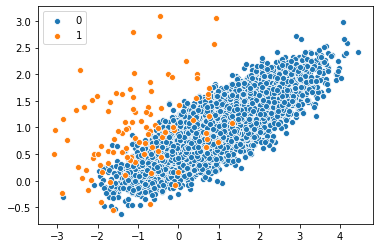

In [71]:
# plot the two classes on a scatterplot
def plot_class(counter, X, y):
    for label, _ in counter.items():
        # where function return the index when evaluates to True
        row_index = where(y == label)[0]
        sns.scatterplot(X[row_index, 0], X[row_index,1], label=str(label), legend='full')

plot_class(counter, X, y)

Counter({0: 9900, 1: 9900})


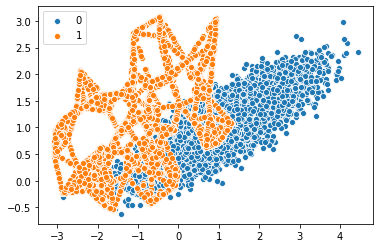

In [75]:
# now try the SMOTE 
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y)

counter = Counter(y_res)
print(counter)

plot_class(counter2, X_res, y_res)

We might want to have smaller number of the minority class comparing to the majority class. We can try limiting the samples or under sampling the majority class. 

Counter({0: 9900, 1: 990})


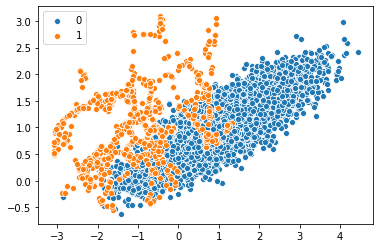

In [76]:
# SMOTE to only 10% of the majority class
oversample2 = SMOTE(sampling_strategy=0.1)
X_res, y_res = oversample2.fit_resample(X, y)

counter = Counter(y_res)
print(counter)

plot_class(counter3, X_res, y_res)

Counter({0: 1000, 1: 100})


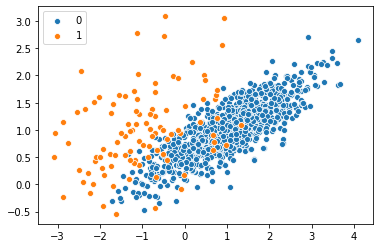

In [86]:
# Under sample the majority class
from imblearn.under_sampling import RandomUnderSampler

# under sample the majority class so that the number minority class is 10% of the number of majority class
undersample = RandomUnderSampler(sampling_strategy=0.1)
X_res, y_res = undersample.fit_resample(X,y)

counter = Counter(y_res)
print(counter)

plot_class(counter3, X_res, y_res)

In [87]:
# to pipeline the two methods
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('oversampling', over),('undersampling',under)]

pipeline = Pipeline(steps=steps)

Counter({0: 1980, 1: 990})


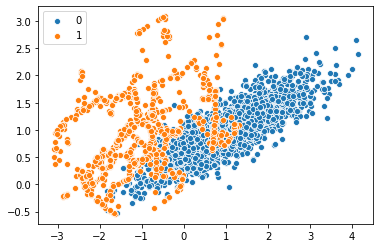

In [88]:
X_res, y_res = pipeline.fit_resample(X, y)

counter = Counter(y_res)
print(counter)

plot_class(counter3, X_res, y_res)

Note that we first oversample the 1s, enlarging the respective sample size to 9900*0.1 = 990. Then we undersample the 0s, shrinking the respective sample size to 990/0.5 = 1980.